                                                                           by Olga Krieger

** Capstone, Part 4: Report Writeup + Technical Analysis**
# Bitcoin: bubble or blabber?
### or, Bitcoin boom or just the beginning? 


**Background:** Today, bitcoin is not only soaring in price; it's also one of the most trending topics on search engines and social media. One of the best proxies of the buzz surrounding any given subject is probably its search volume on Google and other search engines. In fact, investors use Google search and social media data all the time to pick investments.

The purpose of this study is to find out with what accuracy the direction of the price of Bitcoin can be predicted using machine learning methods. This is fundamentally a time series prediction problem. While much research exists surrounding the use of different machine learning techniques for time series prediction, research in this area relating specifically to Bitcoin is lacking.

**Question:** Can we predict the value of bitcoins based on google searches? With what
accuracy can the direction of the price of Bitcoin be predicted using machine learning?

**Hypothesis:** Bitcoin price is greatly influenced by the news, hence the current price move is highly speculative. There is a positive correlation between bitcoin prices and its google searches.

**Data:** Historical price on Bitcoin + Google Trends

**Models**: Time series, Support Vector Regression, Linear Regression
    
**Method**: 
1. Get data:<br> 
    1.a. From Kaggle download the bitcoin data<br>
    1.b. From Google Trends download 'interest' score data<br>
    1.c. Merge the two on 'Date'<br>  

2. EDA:<br> 
    2.a. Trend graph<br>
    2.b. Heatmap<br>
    2.c. Correlation matrix<br>  

3. Modelling:<br> 
    3.a. Time Series<br>
    3.b. SVR<br>
    3.c. Linear Regression<br>
    3.d. Naive Bayes<br>
4. 

**Further considerations**:
- Risks & assumptions:
- Metrics:

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

%matplotlib inline

# 1. Get Data

**set index - no need, only complications**

In [9]:
# df.set_index('date')
# df.index.name = None

## to reset index
# df.index.name = 'date'
# df.reset_index(inplace=True)

### 1.b. bitcoin data 
This dataset has the following features:

- Date : Date of observation
- btc_market_price : Average USD market price across major bitcoin exchanges.
- btc_total_bitcoins : The total number of bitcoins that have already been mined.
- btc_market_cap : The total USD value of bitcoin supply in circulation.
- btc_trade_volume : The total USD value of trading volume on major bitcoin exchanges.
- btc_blocks_size : The total size of all block headers and transactions.
- btc_avg_block_size : The average block size in MB.
- btc_n_orphaned_blocks : The total number of blocks mined but ultimately not attached to the main Bitcoin blockchain.
- btc_n_transactions_per_block : The average number of transactions per block.
- btc_median_confirmation_time : The median time for a transaction to be accepted into a mined block.
- btc_hash_rate : The estimated number of tera hashes per second the Bitcoin network is performing.
- btc_difficulty : A relative measure of how difficult it is to find a new block.
- btc_miners_revenue : Total value of coinbase block rewards and transaction fees paid to miners.
- btc_transaction_fees : The total value of all transaction fees paid to miners.
- btc_cost_per_transaction_percent : miners revenue as percentage of the transaction volume.
- btc_cost_per_transaction : miners revenue divided by the number of transactions.
- btc_n_unique_addresses : The total number of unique addresses used on the Bitcoin blockchain.
- btc_n_transactions : The number of daily confirmed Bitcoin transactions.
- btc_n_transactions_total : Total number of transactions.
- btc_n_transactions_excluding_popular : The total number of Bitcoin transactions, excluding the 100 most popular addresses.
- btc_n_transactions_excluding_chains_longer_than_100 : The total number of Bitcoin transactions per day excluding long transaction chains.
- btc_output_volume : The total value of all transaction outputs per day.
- btc_estimated_transaction_volume : The total estimated value of transactions on the Bitcoin blockchain.
- btc_estimated_transaction_volume_usd : The estimated transaction value in USD value.

In [10]:
b = pd.read_csv("datasets/bitcoin_dataset.csv", parse_dates=['Date'])
# df = pd.read_csv("datasets/bitcoin_dataset.csv")
# df.head()

In [11]:
b.shape

(2920, 24)

In [12]:
# b.info()

In [13]:
# b.sort_values('Date', axis=0, ascending=False)

In [14]:
# Make a boolean mask and re-assign to df
mask = (b['Date'] > '2012-11-07') & (b['Date'] <= '2017-11-07')
b = b.loc[mask]
b.shape

(1826, 24)

In [15]:
# get rid of 'btc_'
b = b.rename(columns={col: col.replace('btc_', '') for col in b.columns})
b.head()

,Date,market_price,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,...,cost_per_transaction_percent,cost_per_transaction,n_unique_addresses,n_transactions,n_transactions_total,n_transactions_excluding_popular,n_transactions_excluding_chains_longer_than_100,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd
1094,2012-11-08,11.09790,10353750.0,1.149049e+08,358473.6925,3429.0,0.098442,0.0,182.0,11.133333,...,3.671315,2.578037,30564.0,34985.0,8708635.0,12054.0,14375.0,1.465964e+06,221365.0,2456684.0
1095,2012-11-09,11.07000,10361000.0,1.146963e+08,211960.5342,3441.0,0.087469,0.0,202.0,12.800000,...,3.851741,2.997240,28883.0,26851.0,8735486.0,11892.0,13836.0,9.956593e+05,188746.0,2089416.0
1096,2012-11-10,10.95899,10369000.0,1.136338e+08,168005.5734,3453.0,0.080664,0.0,277.0,9.883333,...,6.891781,3.305210,24961.0,26595.0,8762081.0,9649.0,12441.0,4.819003e+05,116385.0,1275462.0
1097,2012-11-11,10.93900,10375600.0,1.134987e+08,187117.6000,3463.0,0.077176,0.0,264.0,15.833333,...,9.348406,3.050546,21483.0,23728.0,8785809.0,8038.0,11160.0,3.757137e+05,70782.0,774286.0
1098,2012-11-12,11.18000,10382650.0,1.160780e+08,521129.2840,3474.0,0.080127,0.0,243.0,11.191667,...,5.007497,3.205429,26835.0,24652.0,8810461.0,9925.0,12538.0,5.459378e+05,141148.0,1578039.0


In [16]:
# b.describe()

In [17]:
# b.info()

In [18]:
# b.isnull().sum()

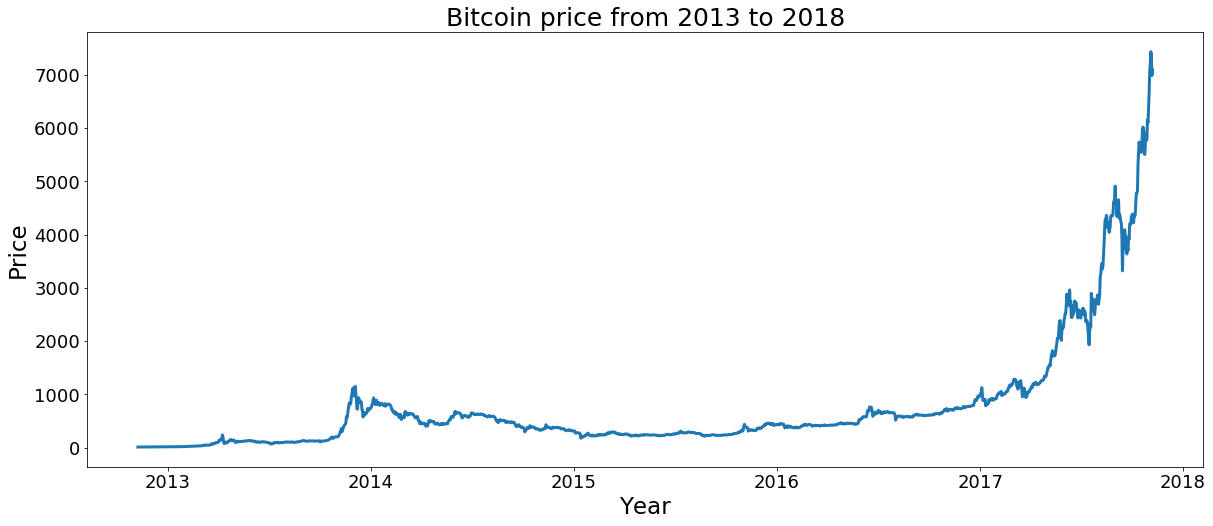

In [19]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.plot(b['Date'], b['market_price'], lw=3)
ax.tick_params(labelsize=18)
ax.set_title('Bitcoin price from 2013 to 2018', fontsize=25)
ax.set_ylabel('Price',fontsize=23)
ax.set_xlabel('Year',fontsize=23)

In [20]:
# b.info()

### 1.b. Google data

**'Interest'** (over time, worldwide):
Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. Likewise a score of 0 means the term was less than 1% as popular as the peak.

In [21]:
g = pd.read_csv('datasets/google_bitcoin_2012.csv', header=1)
g.columns

Index(['Week', 'bitcoin: (Worldwide)'], dtype='object')

In [22]:
g.head()

,Week,bitcoin: (Worldwide)
0,2012-11-11,2
1,2012-11-18,1
2,2012-11-25,2
3,2012-12-02,2
4,2012-12-09,2


In [23]:
# g = g.rename(columns={'bitcoin: (Worldwide)':'Interest over time'}, inplace=True)
g = g.rename(columns={'Week': 'Date','bitcoin: (Worldwide)':'Interest'})

In [24]:
from datetime import datetime
g['Date'] = pd.to_datetime(g['Date'])
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Date        261 non-null datetime64[ns]
Interest    261 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [25]:
g.head()

,Date,Interest
0,2012-11-11,2
1,2012-11-18,1
2,2012-11-25,2
3,2012-12-02,2
4,2012-12-09,2


In [26]:
g.shape

(261, 2)

In [27]:
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
Date        261 non-null datetime64[ns]
Interest    261 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


In [28]:
g.columns

Index(['Date', 'Interest'], dtype='object')

In [29]:
# g = g.set_index(g.iloc[0])
# g.set_index('Month')
# g = g.set_index(['Month'])

# g = g.set_index('Date') # inplace=True

# g.head()

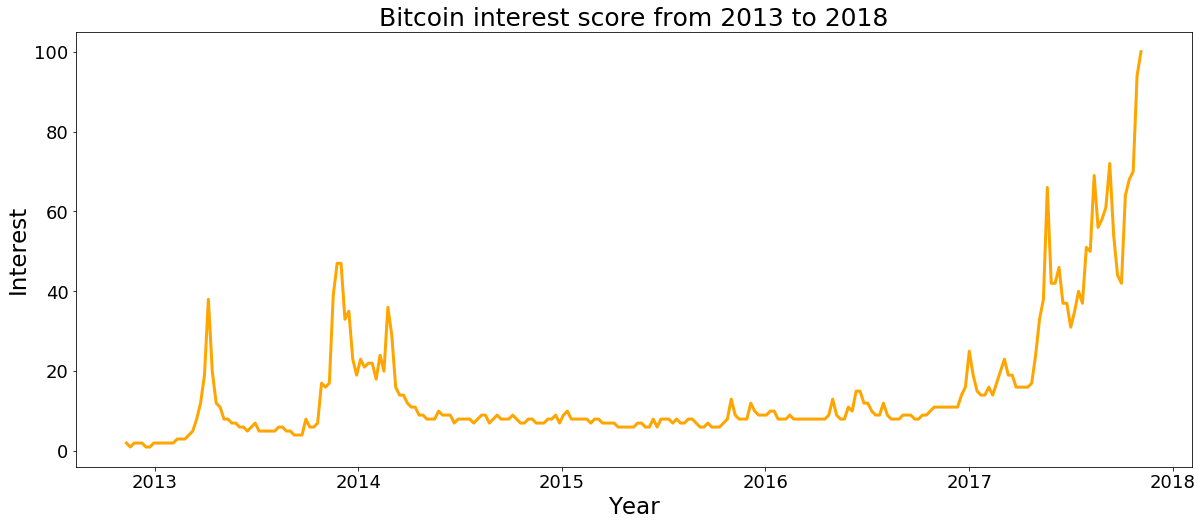

In [30]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.plot(g['Date'], g['Interest'], color='orange', lw=3)
ax.tick_params(labelsize=18)
ax.set_title('Bitcoin interest score from 2013 to 2018', fontsize=25)
ax.set_ylabel('Interest',fontsize=23)
ax.set_xlabel('Year',fontsize=23)

**Interpretation:**The graph above shows bitcoin's search interest over the last 5 years. It currently strikes a value of 100, which translates into an all-time high. There was another spike around 2014 and a little before, but overall the interest over time has gone up. No obvious seasonality, but the [recent] trend is clear.

### 1.c. Join datasets 

In [31]:
# dropping all dates that aren't in google df
df = pd.merge(b, g, how='inner', on=['Date'])

## other possibilities
# df = pd.merge(b, g, how="left", on=['Date'])
# df = pd.concat([b, g], axis=1)

In [32]:
df.shape

(261, 25)

# 2. EDA
Data doesn't have null values, so we can safely proceed discovering the relations within it. 

### 2.a. Graph: Correlation between bitcoin search volume and its market price

In [33]:
# scale the Interest and the Price by dividing by the largest value of its own set
interest_scaled = df['Interest'] / 100
price_scaled = df['market_price'] / 1221.578347

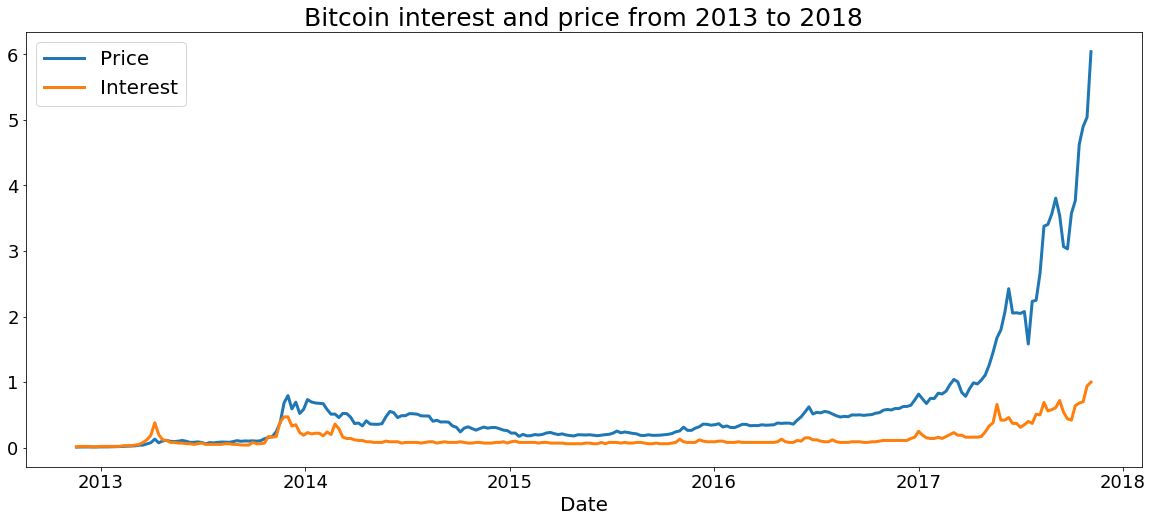

In [34]:
date_ticks = df['Date']

# fig = plt.figure(figsize=(20,8))
# ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(date_ticks[1:], price_scaled[1:], lw=3)#, figsize=(20,8))
ax.plot(date_ticks[1:], interest_scaled[1:], lw=3)#, figsize=(20,8))
plt.xlabel('Date', fontsize=20)
ax.tick_params(labelsize=18)
ax.set_title('Bitcoin interest and price from 2013 to 2018', fontsize=25)
# plt.xlim(['2012-11-11', '2017-11-05'])
# ax.set_xlim([2013, 2018]) # Set the minimum and maximum of x-axis
plt.legend(['Price', 'Interest'], fontsize=20)
# plt.show()

**Interpretation:** Visually we can already see that there is a correlation between the market price and interest. Let’s check if statistical algorithms confirm it. 

### 2.b. EDA: Heatmap of all features

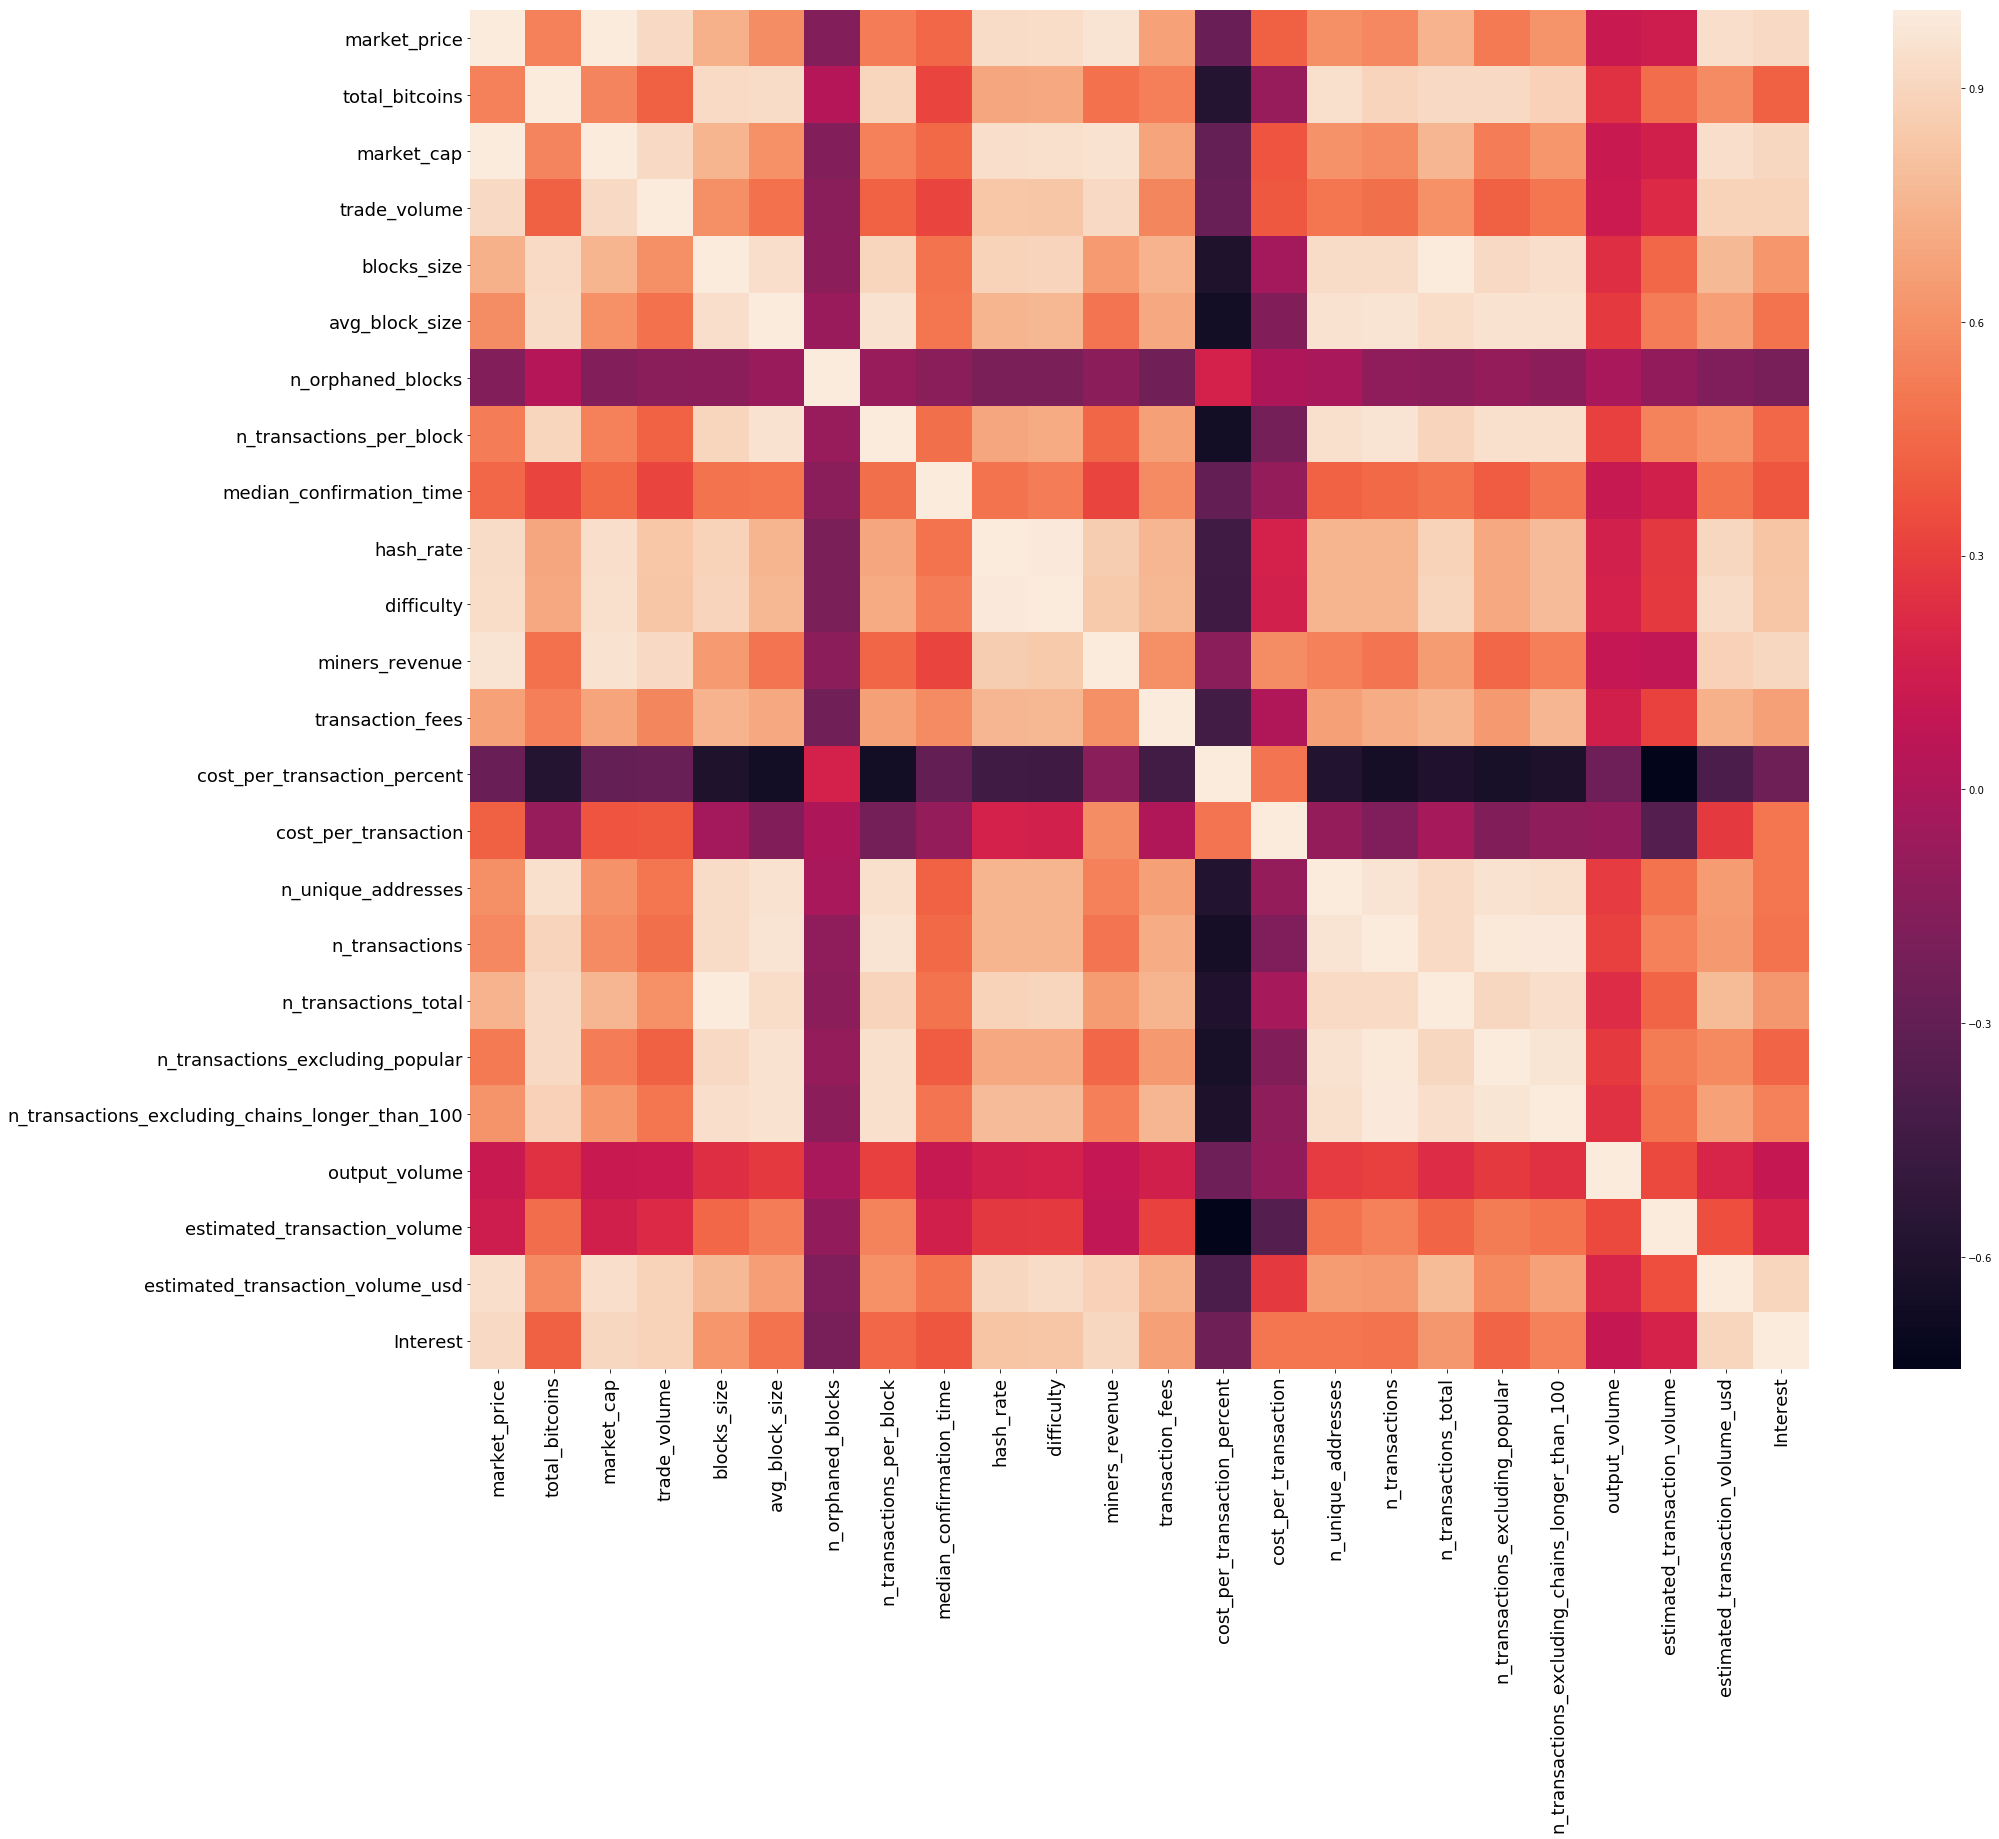

In [35]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(30, 25))
ax.tick_params(labelsize=18)
sns.heatmap(corr)
plt.show()

### 2.c. EDA: Correlation matrix

In [36]:
#get numerical features
numerics = ['int64', 'float64']
num_df = df.select_dtypes(include=numerics)
# Pearson correlation
corr = df.corr()['market_price']
# convert series to dataframe so it can be sorted
corr = pd.DataFrame(corr)
# label the correlation column
corr.columns = ["Correlation"]
# sort correlation
corr2 = corr.sort_values(by=['Correlation'], ascending=False)
corr2.head(15)

,Correlation
market_price,1.000000
market_cap,0.999003
miners_revenue,0.963504
estimated_transaction_volume_usd,0.941108
difficulty,0.937157
hash_rate,0.930085
trade_volume,0.917059
Interest,0.916211
n_transactions_total,0.744599
blocks_size,0.735276


**Interpretation:** Bitcoin market price has a 91% correlation with our main feature, Interest.

# 3. MODELLING

## 3.a. Timeseries

I would like to predict / forecast, based on a history of observations, what the next time's unit bitcoin price will be (_change_ rather than absolute price).

In [37]:
y = df['market_price'].values.reshape(-1, 1)
X = df['Interest'].values.reshape(-1, 1)

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(208, 1) (208, 1)
(53, 1) (53, 1)


In [39]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)

/Users/Olga/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Seasonal Decomposition**

In [40]:
# seasonal_decompose() expects a DateTimeIndex on your DataFrame:
# df = df.set_index('Date')
# df.index.name = None
df['Date'] = pd.to_datetime(df['Date'])
# index=df['Date'].to_timestamp()
df['ts'] = df[['Date']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

## to reset index
# df.index.name = 'date'
# df.reset_index(inplace=True)

/Users/Olga/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


statsmodels.tsa.seasonal.DecomposeResult

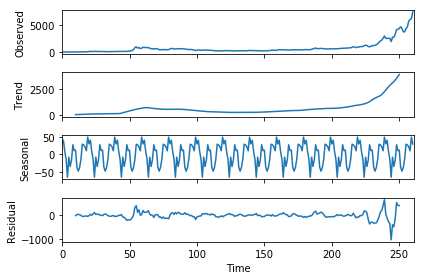

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y, freq=20) # optional arg
result.plot();
type(result)
# You must specify a freq or x must be a pandas object with a timeseries index witha freq not set to None

**Interpretation:** 
- trend seems to accurately represent the observed values 
- seasonality has clear regularity and fluctuations seems to be considerable, with -50 to 50
- residual doesn't look stationary; does not follow seasonality

**Dickey-Fuller test** <br>
To check if the data is stationary

In [42]:
# define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12, center=False).mean()
    rolstd = timeseries.rolling(window=12, center=False).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

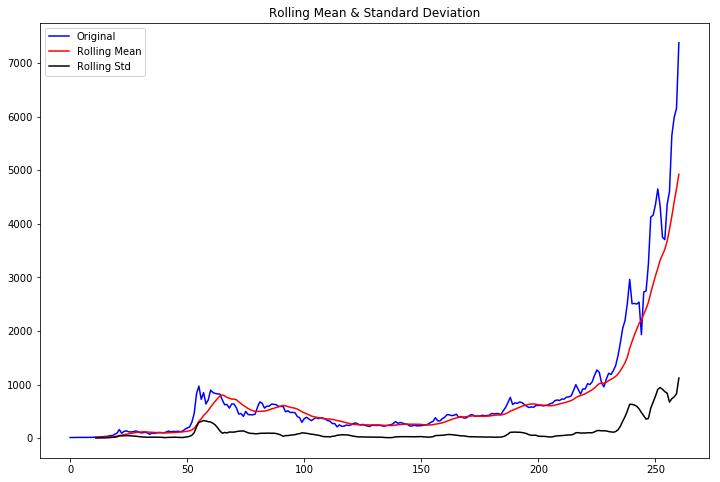

Results of Dickey-Fuller Test:
Test Statistic                   3.508900
p-value                          1.000000
#Lags Used                      13.000000
Number of Observations Used    247.000000
Critical Value (1%)             -3.457105
Critical Value (5%)             -2.873314
Critical Value (10%)            -2.573044
dtype: float64


In [43]:
# perform test
test_stationarity(df['market_price'])

**Autocorrelation** of a series is the correlation between a time series and a lagged version of itself.

[ 1.          0.91925934  0.85939797  0.79848796  0.73868008  0.70183552
  0.67154983  0.65448441  0.6377121   0.60961021  0.56711952  0.52439911
  0.484669    0.43783475  0.405981    0.38458242  0.36156547  0.35624696
  0.33914802  0.32155745  0.30252924  0.28399627  0.25318153  0.22838692
  0.20856838  0.18984676  0.17478248  0.16217524  0.15183748  0.1436451
  0.13716103  0.1305539   0.12544451  0.12285761  0.11872859  0.10990329
  0.09941787  0.08943473  0.08219397  0.07594753  0.06916554  0.06446443
  0.05899161  0.0555614   0.05039454  0.04285809  0.03723815  0.03343061
  0.02990163  0.02607458  0.02279817]


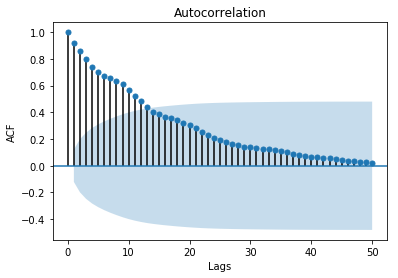

In [44]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
print(acf(df.market_price, nlags=50))
plot_acf(df.market_price, lags=50);
plt.xlabel('Lags')
plt.ylabel('ACF')

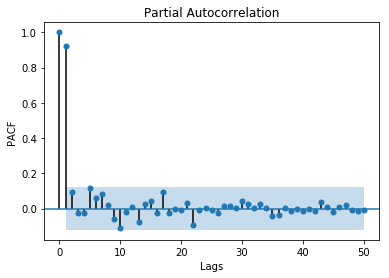

In [45]:
# Partial autocorrelation (PACF) is similar to autocorrelation (ACF), but instead of just the correlation at increasing lags, it is the correlation at a given lag controlling for the effect of previous lags.
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
# print(pacf(df.market_price, nlags=50))
plot_pacf(df.market_price, lags=50);
plt.xlabel('Lags')
plt.ylabel('PACF');

**The data is not stationary, so we need to make it stationary to model.** <br>
The most common way to make a timeseries stationary is to perform "differencing"- it removes trends in the timeseries and ensures that the mean across time is zero. In most cases there will only be a need for a single differencing, although sometimes a second difference (or even more) will be taken to remove trends.

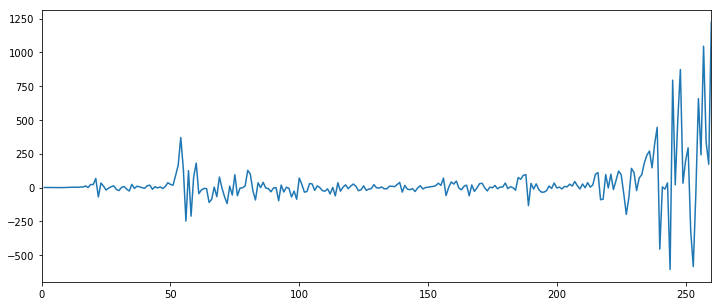

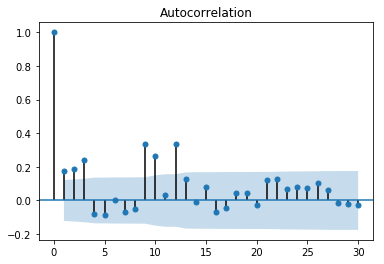

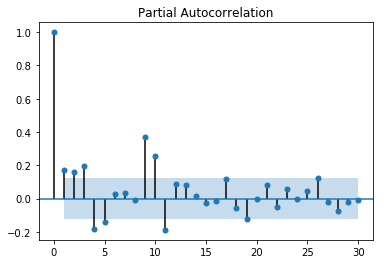

In [46]:
# Difference the market price and plot.
df['market_price_diff']=df['market_price'].diff()
# data.head()
df['market_price_diff'].plot(figsize=(12, 5));

# Plot the ACF and PACF curves of the diff'd series 
udiff= df['market_price_diff']
udiff.dropna(inplace=True)
plot_acf(udiff, lags=30);
plot_pacf(udiff, lags=30);
# Why diff? Warning! Don't diff blindly! Always check to see if you series is really stationary or not. You may need to diff more than once. How to know if your timeseries is stationary? You can formulate stationarity as a hypothesis and then test the hypothesis! An example of this approach is the Dickey-Fuller test

**Interpretation:** 
shaded region is the 95% confidence interval

**Autoregression**, or **AR model** is linear regression applied to timeseries - predicting timesteps based on previous timesteps. How many previous time steps should i use? only those significantly correlated

In [47]:
from statsmodels.tsa.arima_model import ARMA
ar1=ARMA(udiff.values, (1,0)).fit()
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  260
Model:                     ARMA(1, 0)   Log Likelihood               -1691.439
Method:                       css-mle   S.D. of innovations            161.823
Date:                Tue, 19 Dec 2017   AIC                           3388.878
Time:                        06:51:57   BIC                           3399.560
Sample:                             0   HQIC                          3393.173
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5719     12.813      2.308      0.022       4.459      54.685
ar.L1.y        0.2170      0.068      3.195      0.002       0.084       0.350
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.6086           +0.0000j            4.6086            0.0000
-----------------------------------------------------------------------------
"""

**Interpretation** Lower value of AIC suggests "better" model, but it is a relative measure of model fit. 

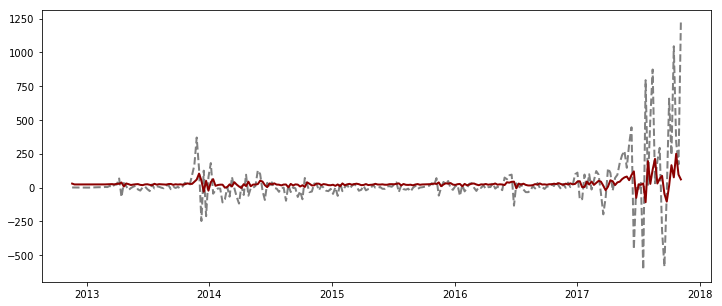

In [48]:
# # "In-sample" predictions
# # Get predictions from the time series:
date_ticks = df['Date']
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], 
        udiff, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], ar1.fittedvalues, lw=2, color='darkred')
plt.show()
# # AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

In [49]:
from sklearn.metrics import r2_score
print(r2_score(udiff, ar1.fittedvalues))
udiff.shape
type(ar1)

0.0379311476307


statsmodels.tsa.arima_model.ARMAResultsWrapper

In [50]:
# ar1 is an object 

In [51]:
# # "Out-of-sample" predictions
# # What if we want to predict more than one time step into the future?
# # get what you need for predicting "steps" steps ahead
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample
params = ar1.params
residuals = ar1.resid
p = ar1.k_ar
q = ar1.k_ma
k_exog = ar1.k_exog
k_trend = ar1.k_trend
steps = 73
oos_predictions = _arma_predict_out_of_sample(params, steps, residuals,
                               p, q, k_trend, k_exog,
                               endog=udiff.values, exog=None, start=100)

In [52]:
oos_predictions.shape

(73,)

In [53]:
date_ticks[101:].shape

(160,)

In [54]:
date_ticks[1:].shape

(260,)

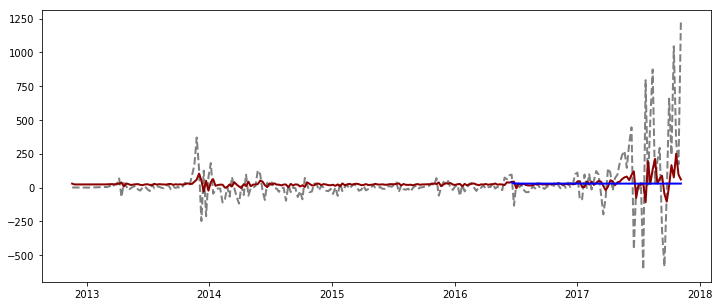

In [55]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], udiff, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], ar1.fittedvalues, lw=2, color='darkred')
ax.plot(date_ticks[188:], 
        oos_predictions, lw=2, color='blue')
plt.show()

** Moving Average model** <br>
(takes previous error terms as inputs. They predict the next value based on deviations from previous predictions. Prediciting on how wrong was i in predicting yesterdays values, it's more of a compensating term.)

In [56]:
ma1=ARMA(udiff.values, (0, 1)).fit()
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  260
Model:                     ARMA(0, 1)   Log Likelihood               -1692.695
Method:                       css-mle   S.D. of innovations            162.613
Date:                Tue, 19 Dec 2017   AIC                           3391.390
Time:                        06:51:57   BIC                           3402.072
Sample:                             0   HQIC                          3395.684
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.0826     11.797      2.465      0.014       5.961      52.204
ma.L1.y        0.1701      0.063      2.680      0.008       0.046       0.295
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -5.8789           +0.0000j            5.8789            0.5000
-----------------------------------------------------------------------------
"""

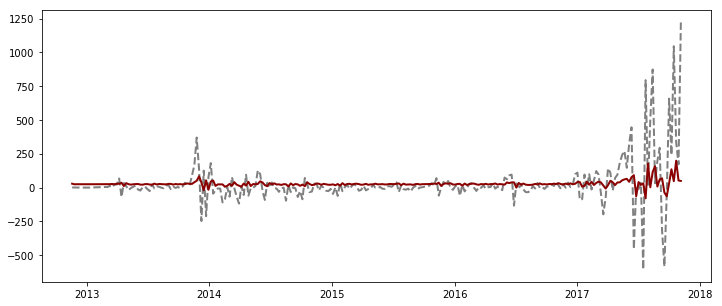

In [57]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], udiff, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], ma1.fittedvalues, lw=2, color='darkred')
plt.show()

In [58]:
r2_score(udiff, ma1.fittedvalues)

0.028523326870250498

**Full ARMA model**

In [59]:
ar1ma1 = ARMA(udiff.values, (1,1)).fit()
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  260
Model:                     ARMA(1, 1)   Log Likelihood               -1683.611
Method:                       css-mle   S.D. of innovations            156.636
Date:                Tue, 19 Dec 2017   AIC                           3375.223
Time:                        06:51:58   BIC                           3389.465
Sample:                             0   HQIC                          3380.948
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         92.2059     98.616      0.935      0.351    -101.078     285.490
ar.L1.y        0.9917      0.011     93.838      0.000       0.971       1.012
ma.L1.y       -0.8968      0.037    -24.361      0.000      -0.969      -0.825
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0084           +0.0000j            1.0084            0.0000
MA.1            1.1151           +0.0000j            1.1151            0.0000
-----------------------------------------------------------------------------
"""

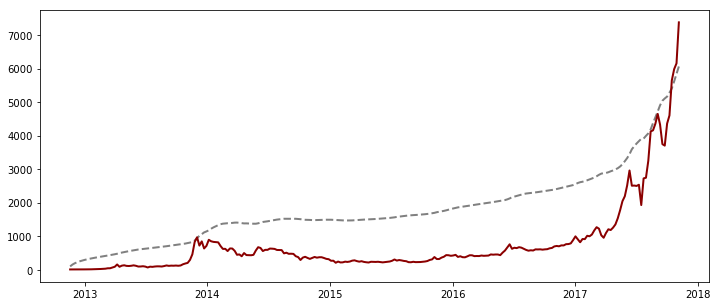

In [60]:
full_pred = df['market_price'].values[0]+np.cumsum(ar1ma1.fittedvalues)
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(date_ticks[1:], full_pred, lw=2, color='grey', ls='dashed')
ax.plot(date_ticks[1:], df['market_price'][1:], lw=2, color='darkred')
plt.show()

## 3.b. Modelling: SVR

Predicting bitcoin price (Weighted Price) based on the google trend score by 
building an SVR model. This should give me an idea of whether the correlation between the two variables is statistically significant and how much the google trend score can change the bitcoin price.

- Support vector regression is a useful and powerful machine learning technique to recognize pattern of time series dataset. It can produce good prediction result if the value of important parameters can be determined properly.
- Max margin classifier
- SVMs work really well for data in which the classes are linearly separable - or data is sparse, small datasets eg. Interest
- SVM solves for a decision boundary that should minimize the generalization error.
- Use kernel trick if data non-linearly separated.

In [61]:
from sklearn import svm, linear_model, datasets
from sklearn.model_selection import cross_val_score

In [62]:
# CREATE LAG PRICE
df['lag_price1'] = df['market_price'].shift(-1)

In [63]:
df['lag_price2'] = df['market_price'].shift(-2)

In [64]:
df['lag_price3'] = df['market_price'].shift(-3)

In [66]:
df['lag_price10'] = df['market_price'].shift(-10)

In [67]:
df = df.dropna(how = 'any')
# X = X.dropna(how = 'all')
# X = X.notnull()
# y = y.notnull()

In [68]:
y = df['market_price']#.values #.reshape(-1, 1)
# X = df[['Interest']]
X = df[['Interest', 'lag_price10', 'lag_price3', 'lag_price2', 'lag_price1']]

In [69]:
df.head()

,Date,market_price,total_bitcoins,market_cap,trade_volume,blocks_size,avg_block_size,n_orphaned_blocks,n_transactions_per_block,median_confirmation_time,...,output_volume,estimated_transaction_volume,estimated_transaction_volume_usd,Interest,ts,market_price_diff,lag_price1,lag_price2,lag_price3,lag_price10
1,2012-11-18,11.83200,10425500.0,1.233545e+08,221950.3680,3563.0,0.094779,0.0,217.0,9.916667,...,2.130380e+06,186303.0,2204342.0,1,1353214800,0.89300,12.60000,12.68000,13.53000,17.99999
2,2012-11-25,12.60000,10477050.0,1.320108e+08,338694.4484,3672.0,0.112150,0.0,219.0,13.216667,...,8.956740e+05,110521.0,1392564.0,2,1353819600,0.76800,12.68000,13.53000,13.66548,20.68000
3,2012-12-02,12.68000,10515650.0,1.333384e+08,219481.9452,3773.0,0.065141,0.0,265.0,8.933333,...,6.317366e+05,118130.0,1497889.0,2,1354424400,0.08000,13.53000,13.66548,13.48547,23.61458
4,2012-12-09,13.53000,10538475.0,1.425856e+08,413504.6784,3871.0,0.113781,0.0,398.0,13.083333,...,8.741865e+05,117807.0,1593928.0,2,1355029200,0.85000,13.66548,13.48547,13.56998,25.60830
5,2012-12-16,13.66548,10560700.0,1.443170e+08,617988.9885,3987.0,0.134223,0.0,336.0,12.300000,...,1.672238e+06,105974.0,1448181.0,1,1355634000,0.13548,13.48547,13.56998,13.52999,30.29777


In [70]:
X.head()

,Interest,lag_price10,lag_price3,lag_price2,lag_price1
1,1,17.99999,13.53000,12.68000,12.60000
2,2,20.68000,13.66548,13.53000,12.68000
3,2,23.61458,13.48547,13.66548,13.53000
4,2,25.60830,13.56998,13.48547,13.66548
5,1,30.29777,13.52999,13.56998,13.48547


In [71]:
df.isnull().sum().sum()

0

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(197, 5) (197,)
(50, 5) (50,)


In [73]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)
print(Xs_train.shape)
print(Xs_test.shape)

(197, 5)
(50, 5)


In [74]:
np.mean(df['market_price'])

587.3596508246156

**Linear SVR**

In [100]:
svr_lin = SVR(kernel= 'linear', C= 1e3) # defining the support vector regression models
svr_lin.fit(Xs_train, y_train) # fitting the data points in the models
y_pred_lin = svr_lin.predict(Xs_test)

In [101]:
svr_lin.score(Xs_test, y_test) #Returns the coefficient of determination R^2 of the prediction

0.94383563985038688

In [138]:
# in linear SVM, the result is a hyperplane that separates the classes as best as possible. 
# The weights represent this hyperplane, by giving the coordinates of a vector which is orthogonal to the hyperplane
svr_lin.coef_

array([[  31.28708478,  -14.64351105,   16.63818257,   99.83920107,
         572.00480517]])

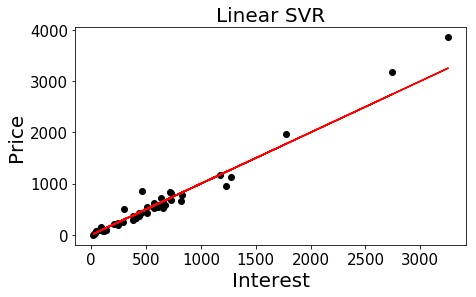

In [102]:
fig, ax = plt.subplots(figsize=(7,4))
plt.scatter(y_test, y_pred_lin, c='k')
plt.plot(y_test, y_test, color= 'red', label= 'Linear model')
plt.title('Linear SVR', fontsize=20)
plt.xlabel('Interest', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.tick_params(labelsize=15)
#plt.legend()
plt.show()

**Polynomial SVR**

In [84]:
svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
svr_poly.fit(Xs_train, y_train)
y_pred_poly = svr_poly.predict(Xs_test)

In [85]:
svr_poly.score(Xs_test, y_test)

0.68792673669076576

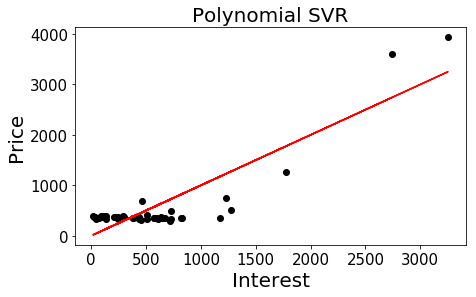

In [98]:
fig, ax = plt.subplots(figsize=(7,4))
plt.scatter(y_test, y_pred_poly, c='k')
plt.plot(y_test, y_test, color= 'red', label= 'Linear model')
plt.title('Polynomial SVR', fontsize=20)
plt.xlabel('Interest', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.tick_params(labelsize=15)
#plt.legend()
plt.show()

** Gaussian / RBF SVR**

In [93]:
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(Xs_train, y_train)
y_pred_rbf = svr_rbf.predict(Xs_test)

In [94]:
svr_rbf.score(Xs_test, y_test)

0.90849050829659095

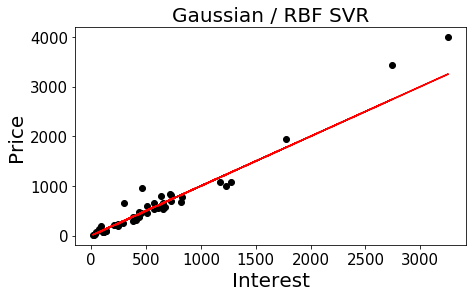

In [103]:
fig, ax = plt.subplots(figsize=(7,4))
plt.scatter(y_test, y_pred_rbf, c='k')
plt.plot(y_test, y_test, color= 'red', label= 'Gaussian model')
plt.title('Gaussian / RBF SVR', fontsize=20)
plt.xlabel('Interest', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.tick_params(labelsize=15)
#plt.legend()
plt.show()

**Interpretation:** 

## 3.c. Modelling:  Simple Linear Regression
** With three sets of features **
1. All Features in df
2. All the lagged versions of main predictor, price
3. Just the main predictor, price

In [104]:
df = df.dropna(how='any')

In [105]:
y = df['market_price']#.values #.reshape(-1, 1)
# X = X = df[[col for col in df.columns if col !='market_price']].copy()
X = df[['Interest', 'lag_price10', 'lag_price3', 'lag_price2', 'lag_price1']]
# X = df[['Interest']]

In [106]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(197, 5) (197,)
(50, 5) (50,)


In [107]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
Xs_test = ss.fit_transform(X_test)

In [108]:
from sklearn.linear_model import LinearRegression
lr = linear_model.LinearRegression()
lr.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
# how much of the variance in the response variable is explained by the model
lr.score(Xs_test, y_test)

0.9738365188796132

In [109]:
# check trained model y-intercept
print(lr.intercept_)
# check trained model coefficients
print(lr.coef_)

587.076619869
[  37.03571163  121.80225667 -145.42031685  143.46941136  499.12705466]


In [111]:
y_pred_lr = lr.predict(Xs_test)

In [112]:
y_pred_lr = lr.predict(Xs_test)
# Actual - prediction = residuals
residuals = y_test - y_pred_lr
np.mean(residuals)

1.3981729215674819

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
rmse= np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)
print(rmse, r2)

124.47491451 0.97383651888


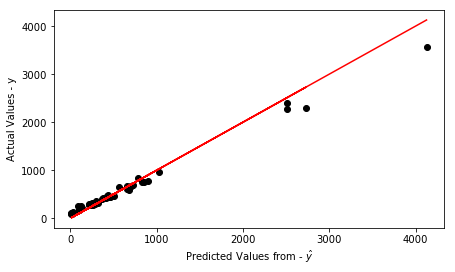

In [129]:
plt.figure(figsize=(7,4))
# plt.scatter(X, df['market_price'].values, c='k') #, s=30, c='r', marker='+') #, zorder=10)
plt.scatter(y_test, y_pred_lr, color='k')
plt.plot(y_test, y_test, color='r')
# plt.plot(y_pred_lr, '.')
# plt.plot(y_test, '-')
plt.xlabel("Predicted Values from - $\hat{y}$")
plt.ylabel("Actual Values - y")
# plt.plot([0, np.max(y_test)], [0, np.max(y_test)])
# plt.show()

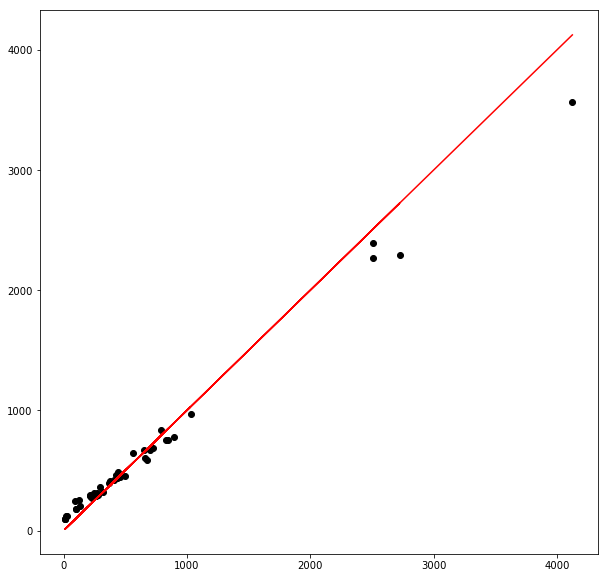

In [136]:
# plot residuals
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
ax.scatter(y_test, y_pred_lr, c='k')
ax.plot(y_test, y_test, color='r');
# iterate over predictions
# for _, row in df.iterrows():
#     plt.plot((row['X'], row['X']), (row['Y'], row['Linear_Yhat']), 'r-')

(array([  6.,  23.,  12.,   6.,   0.,   1.,   0.,   0.,   1.,   1.]),
 array([-157.71737428,  -86.16253465,  -14.60769501,   56.94714462,
         128.50198426,  200.05682389,  271.61166353,  343.16650316,
         414.72134279,  486.27618243,  557.83102206]),
 <a list of 10 Patch objects>)

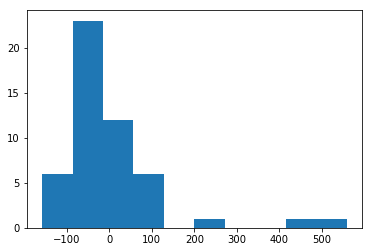

In [116]:
plt.hist(residuals)

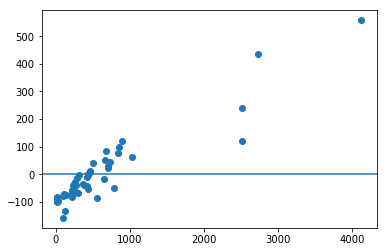

In [117]:
plt.scatter(y_test,residuals)
plt.axhline(0)

** 3.d. Modelling: Naive/Baseline prediction** <br>
To see how the model can do with just the data it has 

In [120]:
df['Mean_Yhat'] = df['market_price'].mean()

In [121]:
# Calculate MSE
df['Mean_Yhat_SE'] = np.square(df['market_price'] - df['Mean_Yhat'])
df['Mean_Yhat_SE'].mean()

463674.61500490666

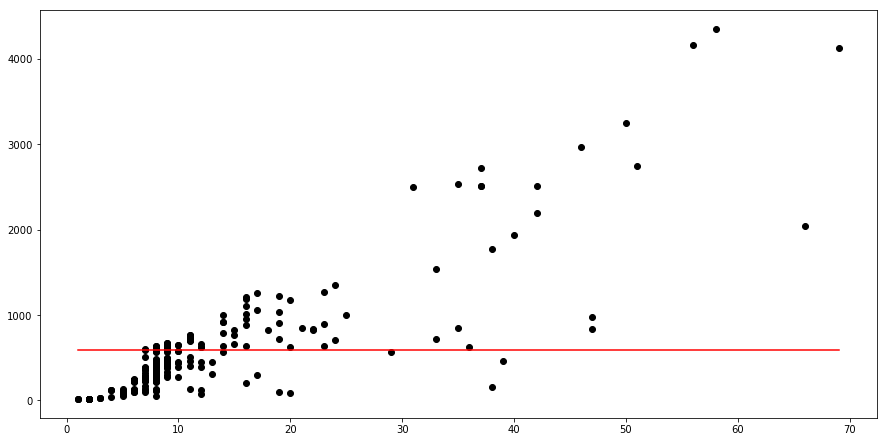

In [122]:
fig= plt.figure(figsize=(15, 7.5))
ax= plt.gca()
ax.scatter(df['Interest'], df['market_price'], c='k')
ax.plot((df['Interest'].min(), df['Interest'].max()), (np.mean(df['market_price']), np.mean(df['market_price'])), color='r');

In [123]:
df['Mean_Yhat'] = df['market_price'].mean()
# Calculate MSE
df['Mean_Yhat_SE'] = np.square(df['market_price'] - df['Mean_Yhat'])
df['Mean_Yhat_SE'].mean()

463674.61500490666